In [1]:
# resave pickle file as compressed .hdf5 file(from 160mb to 5mb)
# import h5py
# import pickle
# import numpy as np

# resave = "Sample#8_withLensInRay"
# with open(resave + '.pickle', 'rb') as f:
#         x = pickle.load(f)

# with h5py.File(resave + '.hdf5','w') as f:
#     f.create_dataset('data',
#                       data=x,
#                       compression='gzip',
#                       compression_opts=9,
#                       chunks=(1, 20, 20, 3))
#     f.create_dataset('label', data=1)

In [2]:
#import sys
#sys.path.append("..")
import SHSlib  as sh
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams["image.interpolation"] = 'nearest'

P = sh.analyse.Processor(floorCap = 40,
              minDist = 30,
              NZernike = 9,
              storeImages=True,
              printZernikeEqasion = False,
              normZernike=False,
              scaleToUnitCircle = True,
              showWarnings = False)


P.loadFile("Sample#9_withLensInRay.hdf5")
imageFolder = "dev\images"

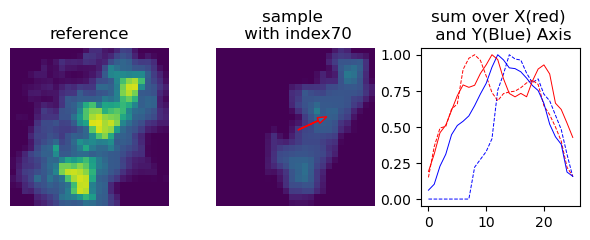

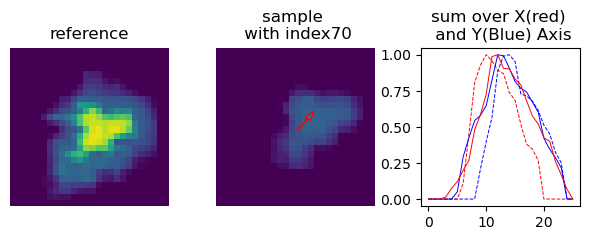

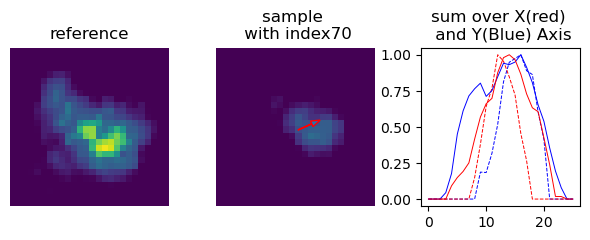

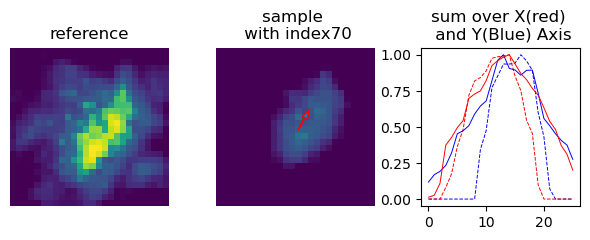

In [3]:
imgIndex = 70
cropRange = 13

for i in range(len(P.refCentroids[0])):
    x = int((P.refCentroids[0][i] +1) * 640/2)
    y = int((P.refCentroids[1][i] +1 ) * 640/2)
    x1 = (P._dxList[imgIndex][i] * 640/2)
    y1 = (P._dyList[imgIndex][i] * 640/2)  
    
    fig,axs = plt.subplots(1,3,figsize= (6,6))
    ref = P.refImageNp[y-cropRange:y+cropRange,x-cropRange:x+cropRange]
    sample = P.Images[imgIndex][y-cropRange:y+cropRange,x-cropRange:x+cropRange]
    vmax = np.max(np.array((ref,sample)))
    
    axs[0].imshow(P.refImageNp[y-cropRange:y+cropRange,x-cropRange:x+cropRange],vmax=255,vmin=40,interpolation='nearest')
    axs[0].set_title("reference")

    c = axs[1].imshow(P.Images[imgIndex][y-cropRange:y+cropRange,x-cropRange:x+cropRange] ,vmax=255,vmin=40,interpolation='nearest')
    axs[1].set_title("sample \n with index" + str(imgIndex))

    axs[1].arrow(cropRange, cropRange, x1, y1 ,head_width = 1,width = 0.05,ec ='red')
    axs[0].axis("off"); axs[1].axis("off")
    
    def norm(A):
        return A/np.max(A)
    LineWidth = 0.7
    axs[2].plot(norm(np.sum(sample,0)),"--b",label="sample x",linewidth=LineWidth)
    axs[2].plot(norm(np.sum(sample,1)),"--r",label="sample x",linewidth=LineWidth)
    axs[2].plot(norm(np.sum(ref,0)),"b",label="sample x",linewidth=LineWidth)
    axs[2].plot(norm(np.sum(ref,1)),"r",label="sample x",linewidth=LineWidth)

    axs[2].set_box_aspect(1)
    axs[2].set_title("sum over X(red) \n and Y(Blue) Axis")
    name = "centroid index " + str(i) +" [x:" + str(x) + " y:" + str(y)+  "]"
    
    #fig.suptitle("centroid index " + str(i) +" [x:" + str(x) + " y:" + str(y)+  "]",y=0.74)
    plt.tight_layout()
    
    
    fig.savefig(imageFolder + "/detailCenroidView "+ str(i) +   ".pdf" ,bbox_inches="tight")
    
    if i >= 3:
        break 
    plt.show()
    

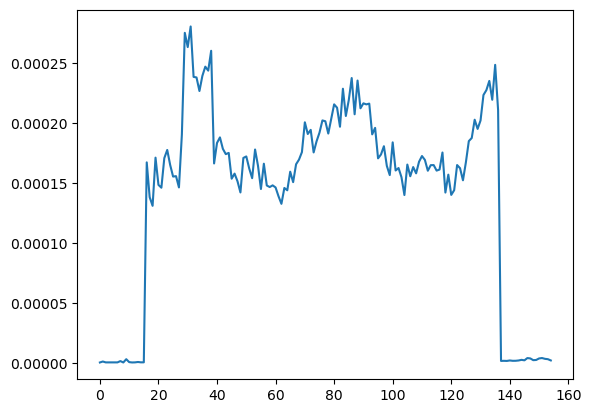

In [4]:
error = [a[1] for a in  P._Coefficients]
plt.plot(error)

## zernike coefficient

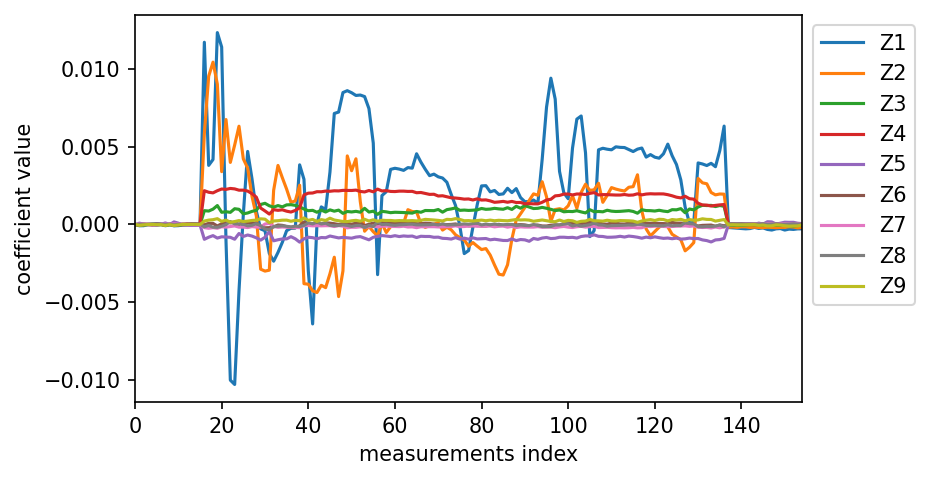

In [5]:
plt.figure(figsize=(6,3),dpi = 150)
#plt.plot(P.Coefficients[:,(2,3,4)])
plt.plot(P.Coefficients[:,:])

plt.legend(["Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9"],bbox_to_anchor=(1,1), loc="upper left")
#plt.title("zernike coefficients")
plt.xlabel("measurements index")
plt.ylabel("coefficient value")

plt.gca().margins(x=0,)
plt.tight_layout(pad=0)
plt.savefig( imageFolder + "\zernike coefficient over many measurments.pdf")

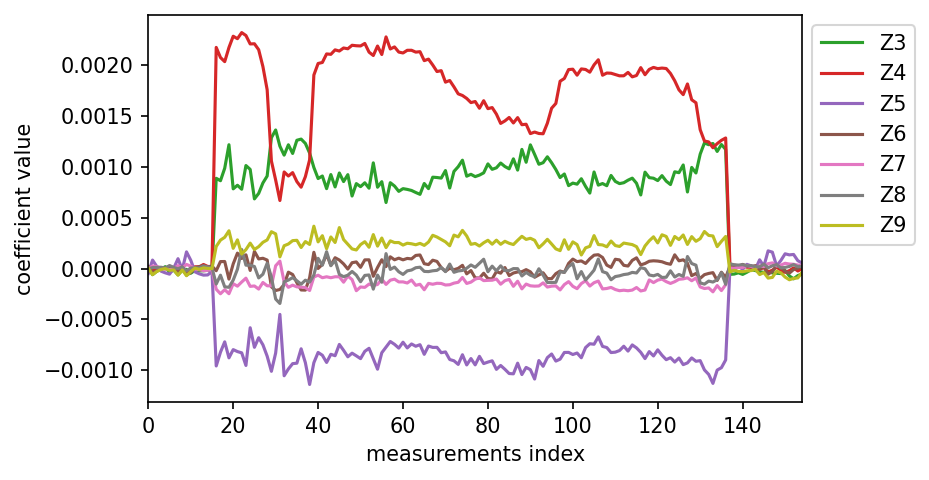

In [6]:
import matplotlib as mpl
cm = mpl.colormaps["tab10"]

plt.figure(figsize=(6,3),dpi = 150)
#plt.plot(P.Coefficients[:,(2,3,4)])
for i in range(2,9):
    plt.plot(P.Coefficients[:,i],color=cm(i))

plt.legend(["Z3","Z4","Z5","Z6","Z7","Z8","Z9"],bbox_to_anchor=(1,1), loc="upper left")
#plt.title("zernike coefficients")
plt.xlabel("measurements index")
plt.ylabel("coefficient value")

plt.gca().margins(x=0,)
plt.tight_layout(pad=0)
plt.savefig(imageFolder + "\zernike coefficient over many measurments_CloseView.pdf")

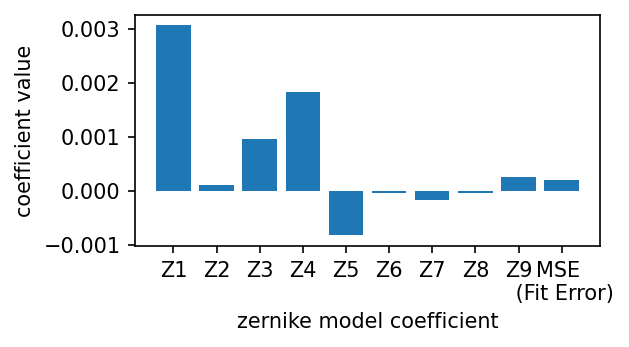

In [7]:
plt.figure(figsize=(4,2),dpi = 150)
plt.bar(["Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9","MSE \n (Fit Error)"],np.append(P.Coefficients[70,:],(P._Coefficients[70][1][0])))
plt.xlabel("zernike model coefficient")
plt.ylabel("coefficient value")
plt.savefig(imageFolder + "\coefficient value sample 70.pdf",bbox_inches="tight")


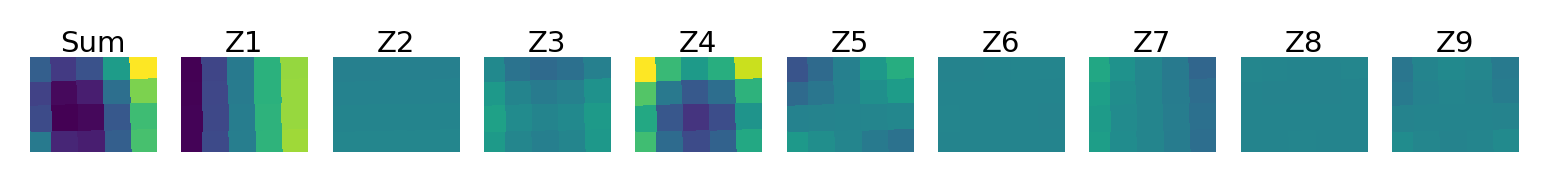

In [8]:
idx = 70
maxVal = np.max(np.array(P.WavefrontComponents[idx]))
minVal = np.min(np.array(P.WavefrontComponents[idx]))

fig,ax = plt.subplots(1,len(P.WavefrontComponents[idx])+1,dpi= 300)
c = ax[0].imshow(P.Wavefront[idx])
ax[0].set_title("Sum",y=0.8,fontdict= {"fontsize":7})
ax[0].axis("off")

for i, comp in enumerate(P.WavefrontComponents[idx]):
    c = ax[i+1].imshow(comp,vmin=minVal,vmax=maxVal)
    ax[i+1].axis("off")
    ax[i+1].set_title(f"Z{i+1}",y=0.8,fontdict= {"fontsize":7})
#plt.colorbar(c,ax=ax[i+1])
plt.show()
fig.savefig(imageFolder + "\Components.pdf",bbox_inches="tight")


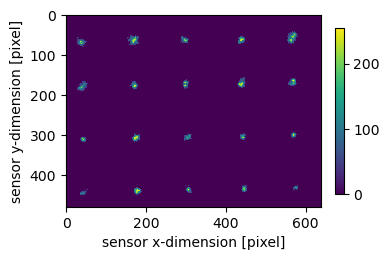

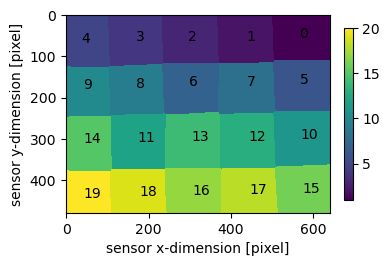

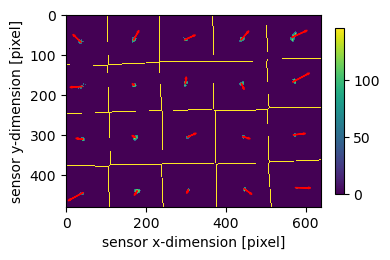

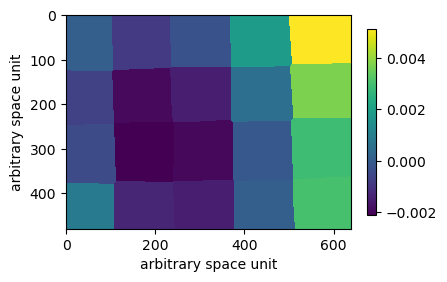

In [9]:
idx = 70

fig,ax = plt.subplots(figsize=(4,4))

c = ax.imshow(P.Images[0]); plt.colorbar(c,ax=ax,fraction= 0.03)

ax.set_xlabel("sensor x-dimension [pixel]")
ax.set_ylabel("sensor y-dimension [pixel]")

plt.tight_layout()
plt.show()
fig.savefig(imageFolder + "/referenc_Wave.pdf",bbox_inches="tight")

fig,ax = plt.subplots(figsize=(4,4))

c = ax.imshow(P.refLabels); plt.colorbar(c,ax=ax,fraction= 0.03)
for i in range(len(P.refCentroids[0])):
    x0 = (P.refCentroids[0][i] +1) * 640/2
    y0 = (P.refCentroids[1][i] +1 ) * 640/2
    ax.text(x0, y0, str(i))


ax.set_xlabel("sensor x-dimension [pixel]")
ax.set_ylabel("sensor y-dimension [pixel]")

plt.tight_layout()
plt.show()
fig.savefig( imageFolder + "/Lables.pdf",bbox_inches="tight")

grid = np.gradient(P.refLabels,1)
grid = np.abs(grid[0]) + np.abs(grid[1])
grid = grid >0


idx = 70
fig,ax = plt.subplots(figsize=(4,4))


c = ax.imshow(P.Images[idx] + grid*np.max(P.Images[idx])); plt.colorbar(c,ax=ax,fraction= 0.03)
ax.set_xlabel("sensor x-dimension [pixel]")
ax.set_ylabel("sensor y-dimension [pixel]")

for i in range(len(P.refCentroids[0])):
    x0 = (P.refCentroids[0][i] +1) * 640/2
    y0 = (P.refCentroids[1][i] +1 ) * 640/2
    x1 = (P._dxList[idx][i] * 640/2)
    y1 = (P._dyList[idx][i] * 640/2) 
    #axs[1,1].plot([x0,x0+x1*10],[y0,y0+y1*10],"")
    ax.arrow(x0, y0, x1*10, y1*10,head_width = 4,width = 0.05,ec ='red')
fig.tight_layout(h_pad=0)
fig.savefig(imageFolder + "/sample_Wave_indx=" + str(idx) + ".pdf",bbox_inches="tight")


fig,ax = plt.subplots(figsize=(4,4))
c = ax.imshow(P.Wavefront[idx]); plt.colorbar(c,ax=ax,fraction= 0.03)
plt.xlabel("arbitrary space unit")
plt.ylabel("arbitrary space unit")

fig.savefig( imageFolder + "/Wavefront_indx=" + str(idx) + ".pdf",bbox_inches="tight")


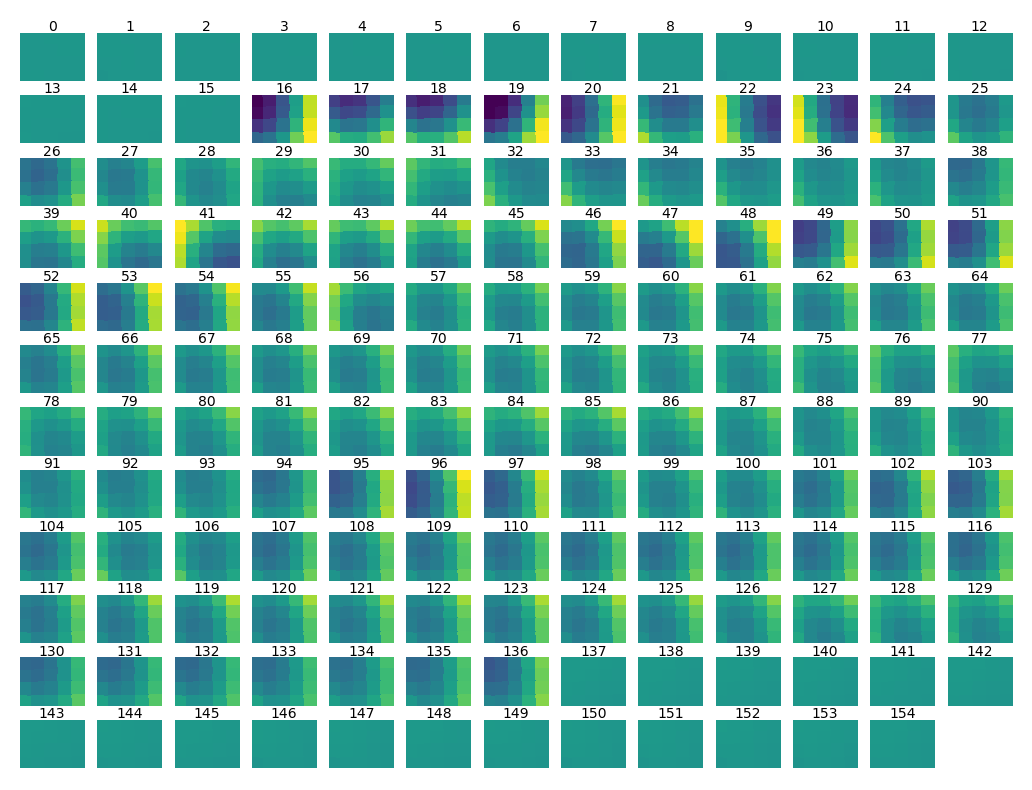

In [10]:
def imagesc(ax,mat,title=None):
    c = ax.imshow(mat); 
    plt.colorbar(c,ax=ax)
    if title:
        ax.set_title(title)
    #plt.tight_layout()
    return c

# Prepeare Figure and colour limets

Samples = P.WavefrontComponents[50:100]
names = np.arange(50,100)
N = len(P.Wavefront)
grid = int(np.ceil(np.sqrt(N)))
fig, axs = plt.subplots(grid-1,grid,dpi= 200)

# color limits 
maxVal = np.max(np.array(P.WavefrontComponents))
minVal = np.min(np.array(P.WavefrontComponents))


for i in range(grid-1):
    for j in range(grid):
        idx = i* grid + j
        if idx >= N:
            axs[i,j].axis("off")
        else:
            #imagesc(axs[i,j],P.Wavefront[idx])
            axs[i,j].imshow(P.Wavefront[idx],vmin=minVal, vmax=maxVal)
            #axs[i,j].imshow(P.Wavefront[idx])
            axs[i,j].axis("off")
            axs[i,j].set_title(idx,y=0.7,fontdict= {"fontsize":5})

plt.savefig(imageFolder + "/allWavefronts.pdf",bbox_inches="tight")
